In [11]:
from fredata import series,window_equalize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

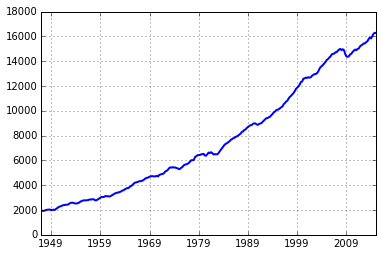

In [12]:
# Verify that initialization works
gdp = series('GDPC1')
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot_date(gdp.datenumbers,gdp.data,'-',lw=2)
ax.grid(True)

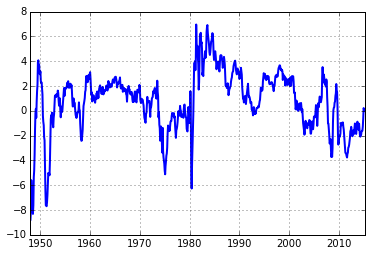

In [13]:
# Series data attributes are numpy arrays:
interest = series('TB3MS')
cpi = series('CPIAUCSL')
cpi.apc()
window_equalize([interest,cpi])

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot_date(cpi.datenumbers,interest.data-cpi.data,'b-',lw=2)
ax.grid(True)


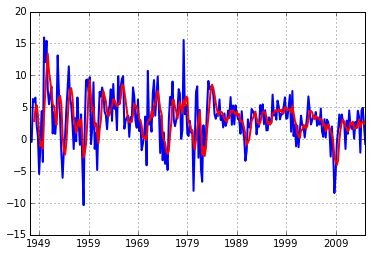

In [14]:
# Percent change and percent change from year ago
gdp1 = series('GDPC1')
gdp2 = series('GDPC1')

gdp1.pc(annualized=True,log=False)
gdp2.apc(log=False)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot_date(gdp1.datenumbers,gdp1.data,'b-',lw=2)
plt.plot_date(gdp2.datenumbers,gdp2.data,'r-',lw=2)
ax.grid(True)

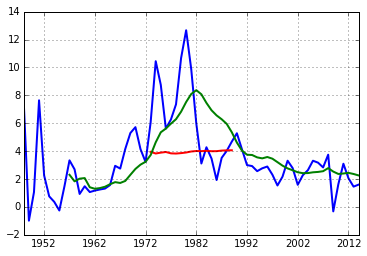

In [15]:
# Moving average

cpi2 = series('CPIAUCSL')
cpi2.monthtoannual()
cpi2.apc()

cpi2.ma2side(length=25)
cpi2.ma1side(length=10)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot_date(cpi2.datenumbers,cpi2.data,'b-',lw=2)
plt.plot_date(cpi2.ma2datenumbers,cpi2.ma2data,'r-',lw=2)
plt.plot_date(cpi2.ma1datenumbers,cpi2.ma1data,'g-',lw=2)
ax.grid(True)


In [16]:
print(len(cpi2.ma1datenumbers))
print(len(cpi2.ma1data))
print(len(cpi2.data))

58
58
67


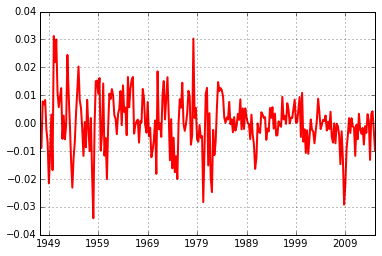

In [17]:
# First difference
gdp1 = series('GDPC1')
gdp2 = series('GDPC1')

gdp1.log()
gdp2.log()

# gdp1.pc(annualized=True,log=False)
gdp2.firstdiff()


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# plt.plot_date(gdp1.datenumbers,gdp1.data,'b-',lw=2)
# plt.plot_date(gdp2.diffdatenumbers,gdp2.difftrend,'r-',lw=2)
plt.plot_date(gdp2.diffdatenumbers,gdp2.diffcycle,'r-',lw=2)
ax.grid(True)

In [18]:
cpi = series('CPIAUCSL')
cpi.monthtoquarter()
cpi.apc()
p = cpi.data
length=20

z = np.array([])
for x in range(len(p)-2*length):
    z = np.append(z,np.mean(p[x+0:x+2*length]))
dts = cpi.datenumbers[length:-length]

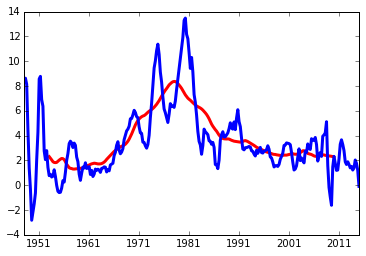

In [19]:
plt.plot_date(dts,z,'r-',lw=3)
plt.plot_date(cpi.datenumbers,cpi.data,'b-',lw=3)

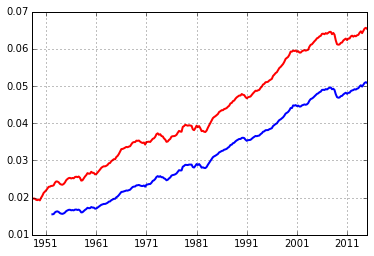

In [20]:
# percapita
gdp1 = series('GDPC1')
gdp2 = series('GDPC1')
gdp1.percapita(total_pop=True)
gdp2.percapita(total_pop=False)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot_date(gdp1.datenumbers,gdp1.data,'b-',lw=2)
plt.plot_date(gdp2.datenumbers,gdp2.data,'r-',lw=2)
ax.grid(True)